In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
file_path = "Food_CPI_data.csv"
CPI_df = pd.read_csv(file_path)
CPI_df

,DATE,CUSR0000SAF112
0,1967-01-01,38.100
1,1967-02-01,38.000
2,1967-03-01,37.800
3,1967-04-01,37.500
4,1967-05-01,37.400
...,...,...
668,2022-09-01,318.374
669,2022-10-01,319.917
670,2022-11-01,320.034
671,2022-12-01,322.507


In [46]:
#Rename the price column
CPI_df.rename(mapper={"CUSR0000SAF112" : "Index (1982-1984=100)"}, axis=1, inplace=True)
CPI_df.head()

,DATE,Index (1982-1984=100)
0,1967-01-01,38.1
1,1967-02-01,38.0
2,1967-03-01,37.8
3,1967-04-01,37.5
4,1967-05-01,37.4


In [47]:
#View datatypes to see what needs to be changed
CPI_df.dtypes

DATE                      object
Index (1982-1984=100)    float64
dtype: object

In [48]:
#Change DATE to datetime
CPI_df['DATE'] = pd.to_datetime(CPI_df["DATE"], format="%Y-%m-%d")
CPI_df.head()

,DATE,Index (1982-1984=100)
0,1967-01-01,38.1
1,1967-02-01,38.0
2,1967-03-01,37.8
3,1967-04-01,37.5
4,1967-05-01,37.4


In [49]:
#View datatypes to confirm change
CPI_df.dtypes

DATE                     datetime64[ns]
Index (1982-1984=100)           float64
dtype: object

In [50]:
#check if there are null values
CPI_df.isnull().sum()

DATE                     0
Index (1982-1984=100)    0
dtype: int64

In [51]:
# Remove all data before 1990-01-01 and store to new df
cleaned_CPI_df = CPI_df[CPI_df["DATE"] >= "1989-01-01"]
cleaned_CPI_df

,DATE,Index (1982-1984=100)
264,1989-01-01,117.900
265,1989-02-01,118.400
266,1989-03-01,120.400
267,1989-04-01,120.900
268,1989-05-01,121.600
...,...,...
668,2022-09-01,318.374
669,2022-10-01,319.917
670,2022-11-01,320.034
671,2022-12-01,322.507


In [52]:
# rename "DATE" column to "date_time" per team data process in README
cleaned_CPI_df.rename(mapper={"DATE" : "date_time"}, axis=1, inplace=True)
cleaned_CPI_df.head()

C:\Users\jhillman\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date_time,Index (1982-1984=100)
264,1989-01-01,117.9
265,1989-02-01,118.4
266,1989-03-01,120.4
267,1989-04-01,120.9
268,1989-05-01,121.6


In [53]:
# Calculate percent change
cleaned_CPI_df["Pct_Change"] = cleaned_CPI_df["Index (1982-1984=100)"].pct_change(periods=12)
cleaned_CPI_df.head(30)

C:\Users\jhillman\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date_time,Index (1982-1984=100),Pct_Change
264,1989-01-01,117.9,NaN
265,1989-02-01,118.4,NaN
266,1989-03-01,120.4,NaN
267,1989-04-01,120.9,NaN
268,1989-05-01,121.6,NaN
269,1989-06-01,122.1,NaN
270,1989-07-01,121.7,NaN
271,1989-08-01,121.9,NaN
272,1989-09-01,122.5,NaN
273,1989-10-01,122.2,NaN


In [56]:
# Calculate percent change
cleaned_CPI_df["Pct_Change"] = cleaned_CPI_df["Pct_Change"] * 100
cleaned_CPI_df.head(30)

C:\Users\jhillman\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date_time,Index (1982-1984=100),Pct_Change
276,1990-01-01,126.1,6.955047
277,1990-02-01,127.0,7.263514
278,1990-03-01,127.4,5.813953
279,1990-04-01,128.1,5.955335
280,1990-05-01,128.2,5.427632
281,1990-06-01,130.2,6.633907
282,1990-07-01,130.3,7.066557
283,1990-08-01,130.9,7.383101
284,1990-09-01,131.8,7.591837
285,1990-10-01,132.7,8.592471


In [57]:
# Remove all data before 1990-01-01 and store to new df
cleaned_CPI_df = cleaned_CPI_df[cleaned_CPI_df["date_time"] >= "1990-01-01"]
cleaned_CPI_df

,date_time,Index (1982-1984=100),Pct_Change
276,1990-01-01,126.100,6.955047
277,1990-02-01,127.000,7.263514
278,1990-03-01,127.400,5.813953
279,1990-04-01,128.100,5.955335
280,1990-05-01,128.200,5.427632
...,...,...,...
668,2022-09-01,318.374,8.964276
669,2022-10-01,319.917,8.002714
670,2022-11-01,320.034,6.721044
671,2022-12-01,322.507,7.644424


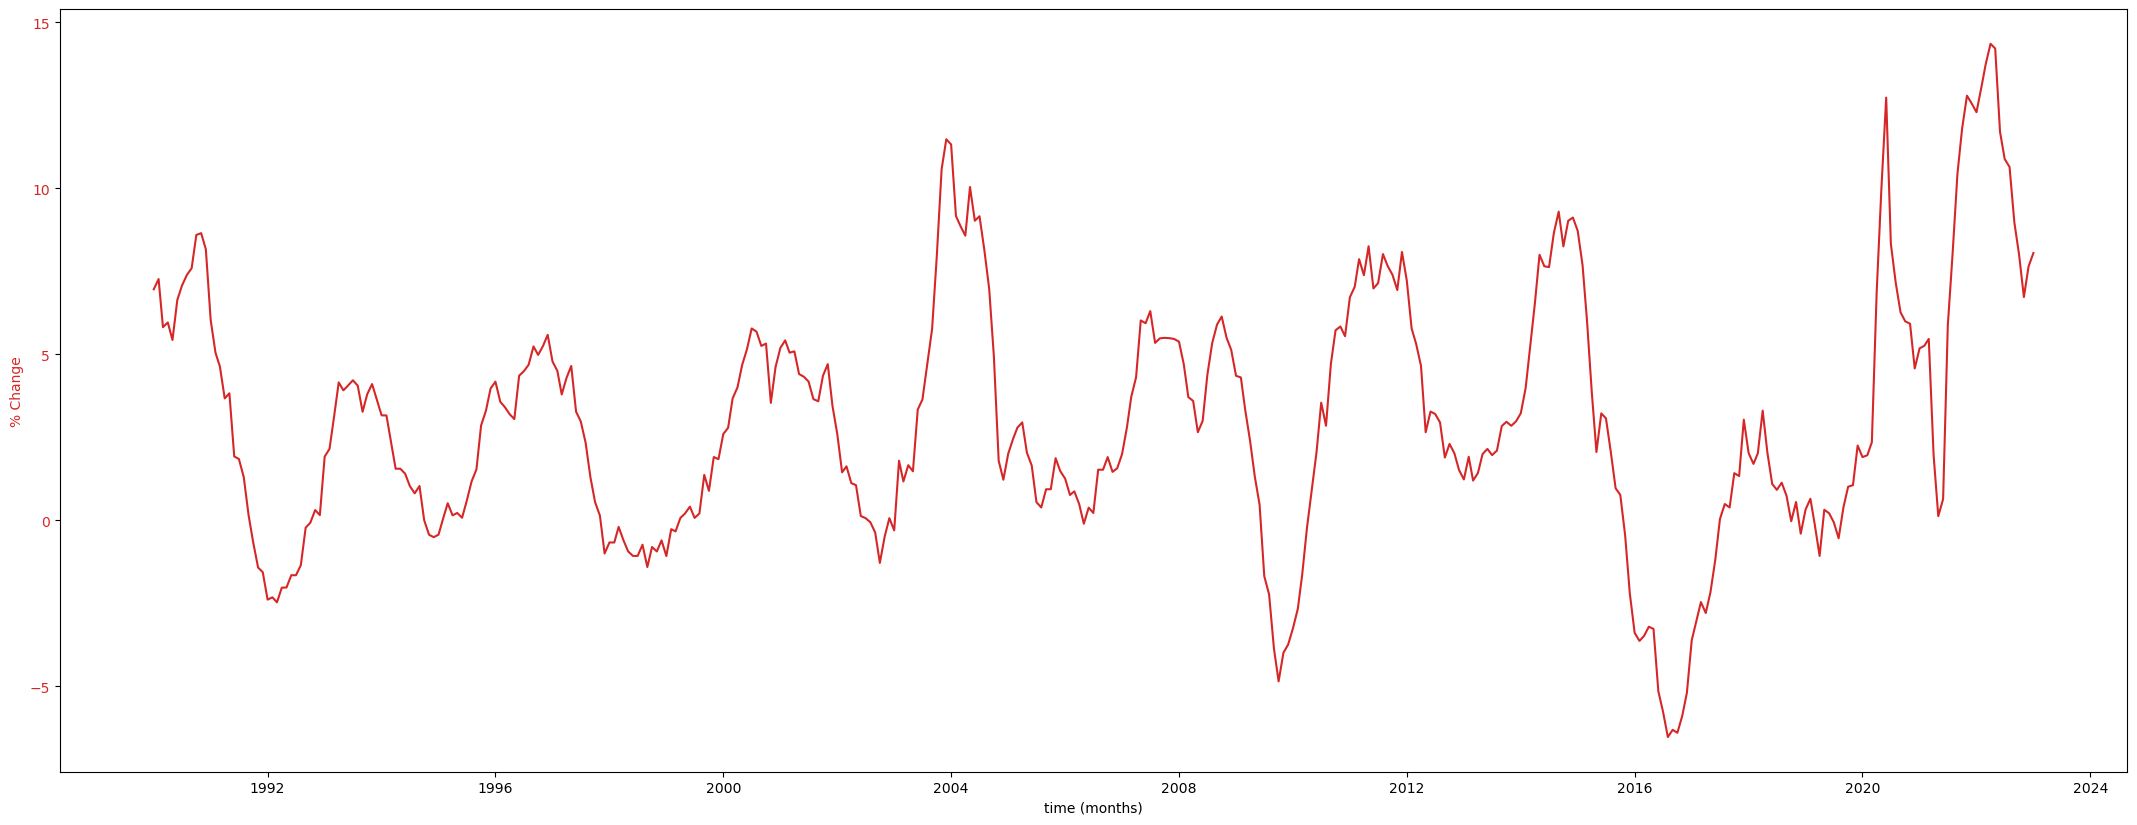

In [61]:
t = cleaned_CPI_df["date_time"].values

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (months)')
ax1.set_ylabel('% Change', color=color)
ax1.plot(t, cleaned_CPI_df["Pct_Change"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_size_inches(24, 9)
plt.show()

In [ ]:
# Store new DF as new csv file
output_path = "Output/Food_CPI_cleaned.csv"
cleaned_CPI_df.to_csv(output_path)